<a href="https://colab.research.google.com/github/adisanto85/DataSecurity/blob/main/Data_Security_Table_Parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# URL of the webpage containing the table
url = 'https://www.unb.ca/cic/datasets/ids-2018.html'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the webpage
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tables on the webpage that match the selector
tables = soup.find_all('table')

# Check if at least two tables are found
if len(tables) >= 2:
    # Extract the second table from the list of found tables
    table = tables[1]

    # Create an empty list to store the table data
    table_data = []

    # Loop through each row in the table
    for row in table.find_all('tr'):
        # Extract the text from each cell in the row and append it to the table data list
        row_data = [cell for cell in row.find_all(['th', 'td'])]
        #print(row_data)
        # Check if any cell contains multiple IP addresses separated by newlines
        for i, cell in enumerate(row_data):
            if cell.find(['br']):
                # Split the cell content by newline and add individual IP addresses to the list
                row_data[i] = cell.get_text(separator="<br/>").split("<br/>")
                print(row_data[i])
        row_data = [cell if isinstance(cell, list) else cell.get_text(strip=True) for cell in row_data]
        table_data.append(row_data)

    # Print the table data
    for row in table_data:
        print(row)
else:
    print('Less than two tables found on the webpage.')

['172.31.70.4', '(Valid IP:18.221.219.4)']
['172.31.69.25', '(Valid IP:18.217.21.148)']
['172.31.70.6', '(Valid IP:13.58.98.64)']
['172.31.70.46', '(Valid IP:18.219.211.138)']
['172.31.70.8', '(Vazlid IP:18.217.165.70)']
['172.31.70.23', '(Valid IP: 13.59.126.31)']
['172.31.70.16', '(Valid IP:18.219.193.20)']
['18.218.115.60', '18.219.9.1', '18.219.32.43', '18.218.55.126', '52.14.136.135', '18.219.5.43', '18.216.200.189', '18.218.229.235', '18.218.11.51', '18.216.24.42']
['18.218.115.60', '18.219.9.1', '18.219.32.43', '18.218.55.126', '52.14.136.135', '18.219.5.43', '18.216.200.189', '18.218.229.235', '18.218.11.51', '18.216.24.42']
['18.218.115.60', '18.219.9.1', '18.219.32.43', '18.218.55.126', '52.14.136.135', '18.219.5.43', '18.216.200.189', '18.218.229.235', '18.218.11.51', '18.216.24.42']
['18.218.115.60', '18.219.9.1', '18.219.32.43', '18.218.55.126', '52.14.136.135', '18.219.5.43', '18.216.200.189', '18.218.229.235', '18.218.11.51', '18.216.24.42']
['18.217.218.111-172.31.69.23

In [ ]:
# Convert table data to a Pandas DataFrame
df = pd.DataFrame(table_data[1:], columns=table_data[0])
df

,Attacker,Victim,Attack Name,Date,Attack Start Time,Attack Finish Time
0,"[172.31.70.4, (Valid IP:18.221.219.4)]","[172.31.69.25, (Valid IP:18.217.21.148)]",FTP-BruteForce,Wed-14-02-2018,10:32,12:09
1,"[172.31.70.6, (Valid IP:13.58.98.64)]",18.217.21.148- 172.31.69.25,SSH-Bruteforce,Wed-14-02-2018,14:01,15:31
2,"[172.31.70.46, (Valid IP:18.219.211.138)]",18.217.21.148- 172.31.69.25,DoS-GoldenEye,Thurs-15-02-2018,9:26,10:09
3,"[172.31.70.8, (Vazlid IP:18.217.165.70)]",18.217.21.148- 172.31.69.25,DoS-Slowloris,Thurs-15-02-2018,10:59,11:40
4,"[172.31.70.23, (Valid IP: 13.59.126.31)]",18.217.21.148- 172.31.69.25,DoS-SlowHTTPTest,Fri-16-02-2018,10:12,11:08
5,"[172.31.70.16, (Valid IP:18.219.193.20)]",18.217.21.148- 172.31.69.25,DoS-Hulk,Fri-16-02-2018,13:45,14:19
6,"[18.218.115.60, 18.219.9.1, 18.219.32.43, 18.2...",18.217.21.148- 172.31.69.25,DDoS attacks-LOIC-HTTP,Tues-20-02-2018,10:12,11:17
7,"[18.218.115.60, 18.219.9.1, 18.219.32.43, 18.2...",18.217.21.148- 172.31.69.25,DDoS-LOIC-UDP,Tues-20-02-2018,13:13,13:32
8,"[18.218.115.60, 18.219.9.1, 18.219.32.43, 18.2...",18.218.83.150- 172.31.69.28,DDOS-LOIC-UDP,Wed-21-02-2018,10:09,10:43
9,"[18.218.115.60, 18.219.9.1, 18.219.32.43, 18.2...",18.218.83.150- 172.31.69.28,DDOS-HOIC,Wed-21-02-2018,14:05,15:05


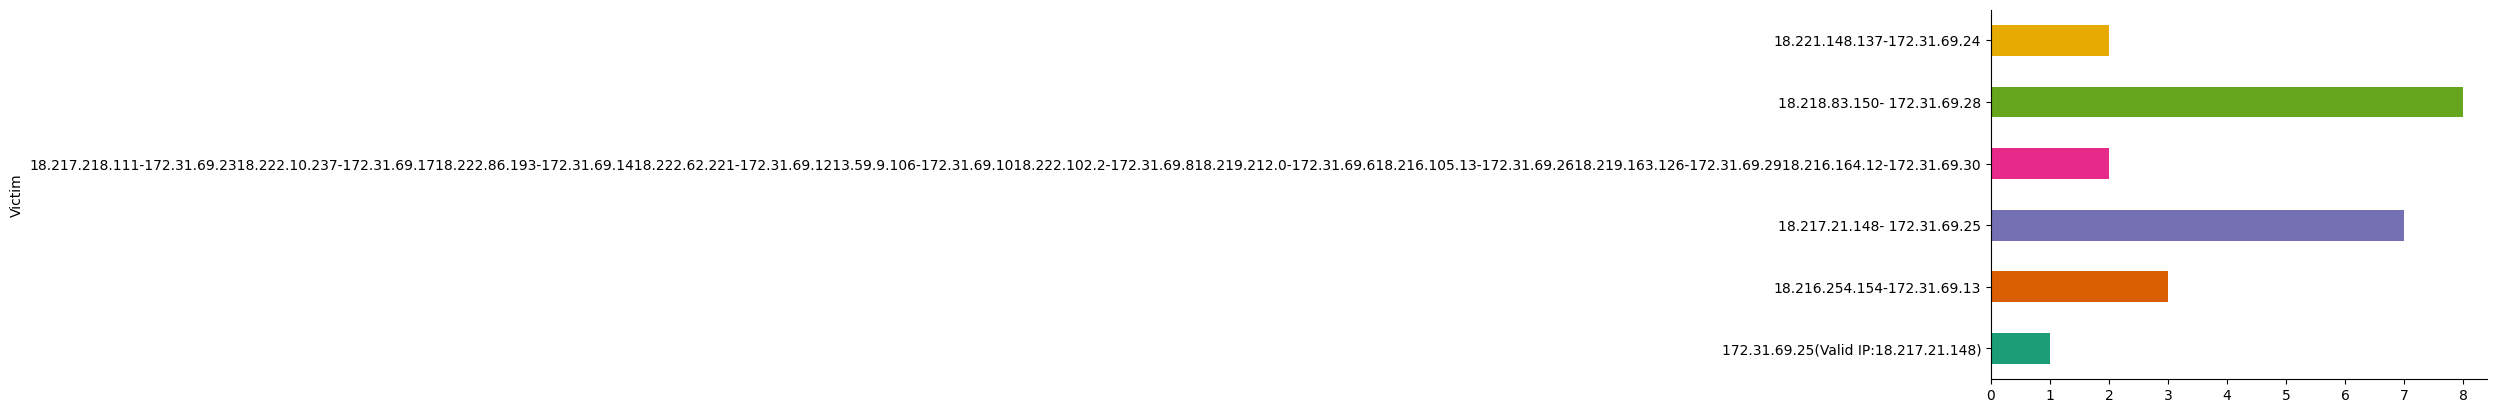

In [ ]:
# @title Victim

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Victim').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.to_csv('/content/drive/MyDrive/DataSecurity/dataset_summary.csv')